<h1 style="color:#D40078; font-weight:bold;">Neural Network From Scratch With Numpy:</h1>  
<span style="color:#4B9CD3;">CA4-AI Course</span><br>
<span style="color:#4B9CD3;">Full Name: Ghazal Mousavi</span><br>
<span style="color:#4B9CD3;">SID: 810002006</span>

In [385]:
from gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from data import get_MNIST_data, get_normalized_MNIST_data, get_california_housing_data, get_california_housing_normalized__data
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
from solver import *
import pandas as pd
from sklearn.datasets import fetch_california_housing


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.cmap'] = 'gray'

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def print_mean_std(x,axis=0):
    print(f"  means: {x.mean(axis=axis)}")
    print(f"  stds:  {x.std(axis=axis)}\n")

<h1 style="color:#D40078; font-weight:bold;">Fully-Connected Neural Nets</h1>
<span style="color:blue">In this exercise we will implement fully-connected networks using a modular approach. For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:</span>

<h1 style="color:#D40078; font-weight:bold;">Affine layer: forward</h1>
<span style="color:blue">Implement the `affine_forward` function.</span>

In [441]:
def affine_forward(x, w, b):
    """
    Computes the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.

    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """

    N = x.shape[0] 
    D = np.prod(x.shape[1:])
    
    cache = (x, w, b)
    z = np.dot(x.reshape(N, D), w)
    
    out = z + b
    
    return out, cache
    

In [387]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769848888397517e-10


<h1 style="color:#D40078; font-weight:bold;">Affine layer: backward</h1>
<span style="color:blue">Now implement the `affine_backward` function and test your implementation using numeric gradient checking.</span>

In [388]:
def affine_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.

    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x: Input data, of shape (N, d_1, ... d_k)
      - w: Weights, of shape (D, M)
      - b: Biases, of shape (M,)

    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """    

    x, w, b = cache
    
    N = x.shape[0]  
    D = np.prod(x.shape[1:])  
    
    dx = np.dot(dout, w.T).reshape(x.shape) 

    dw = np.dot(x.reshape(N, D).T, dout) 

    db = np.sum(dout, axis=0)

    return dx,dw,db

In [389]:
# Test the affine_backward function
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around e-10 or less
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  5.399100368651805e-11
dw error:  9.904211865398145e-11
db error:  2.4122867568119087e-11


<h1 style="color:#D40078; font-weight:bold;">ReLU activation: forward</h1>
<span style="color:blue">Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using numeric gradient checking.</span>

In [390]:
def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    
    out = np.maximum(0, x)
    cache = x
    
    return out, cache

In [391]:
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


<h1 style="color:#D40078; font-weight:bold;">ReLU activation: backward</h1>
<span style="color:blue">Now implement the backward pass for the ReLU activation function in the `relu_backward` function.</span>

In [149]:
def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    
    x = cache
    drelu = np.where(x > 0, 1, 0)
    dx = dout*drelu
    
    return dx

In [150]:
# Test the relu_backward function
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


<h1 style="color:#D40078; font-weight:bold;">Sigmoid activation: forward</h1>
<span style="color:blue">Implement the forward pass for the Sigmoid activation function in the `sigmoid_forward` function and test your implementation using numeric gradient checking.</span>

In [151]:
def sigmoid_forward(x):
    """
    Computes the forward pass for a layer of Sigmoid.

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    out = 1/(1 + np.exp(-x)) 
    cache = x
    return out, cache

In [152]:
# Test the sigmoid_forward function
x = np.linspace(-6, 6, num=12).reshape(3, 4)

out, _ = sigmoid_forward(x)
correct_out = np.array([[0.00247262, 0.00732514, 0.0214955 , 0.06138311],
                        [0.16296047, 0.36691963, 0.63308037, 0.83703953],
                        [0.93861689, 0.9785045 , 0.99267486, 0.99752738]])

print('Testing sigmoid_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing sigmoid_forward function:
difference:  6.383174040859927e-07


<h1 style="color:#D40078; font-weight:bold;">Sigmoid activation: backward</h1>
<span style="color:blue">Now implement the backward pass for the Sigmoid activation function in the `sigmoid_backward` function.</span>

In [153]:
def sigmoid_backward(dout, cache):
    """
    Computes the backward pass for a layer of Sigmoid.

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """

    x = cache
    sigma = 1/(1 + np.exp(-x)) 
    dsigma = sigma*(1-sigma)
    dx = dout*dsigma
    return dx

In [154]:
# Test the sigmoid_backward function
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: sigmoid_forward(x)[0], x, dout)

_, cache = sigmoid_forward(x)
dx = sigmoid_backward(dout, cache)

# The error should be on the order of e-11
print('Testing sigmoid_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing sigmoid_backward function:
dx error:  3.446520386706568e-11


<h1 style="color:#D40078; font-weight:bold;">"Sandwich" layers</h1>
<span style="color:blue">There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. Implement the forward and backward pass for the affine layer followed by a ReLU nonlinearity in the `affine_relu_forward` and `affine_relu_backward` functions.</span>

In [157]:
def affine_relu_forward(x, w, b):
    """
    Convenience layer that performs an affine transform followed by a ReLU

    Inputs:
    - x: Input to the affine layer
    - w, b: Weights for the affine layer

    Returns a tuple of:
    - out: Output from the ReLU
    - cache: Object to give to the backward pass
    """
 
    out_fc, fc_cache = affine_forward(x, w, b)

    out, relu_cache = relu_forward(out_fc)
    cache = (fc_cache, relu_cache)
    
    return out, cache
    

In [158]:
def affine_relu_backward(dout, cache):
    """
    Backward pass for the affine-relu convenience layer
    
    Inputs:
    - dout: Upstream derivatives, of any shape
    - cache: (fc_cache, relu_cache)
      
    Returns a tuple of:
    - dx: Gradient with respect to x
    - dw: Gradient with respect to w
    - db: Gradient with respect to b
    """
 
    fc_cache, relu_cache = cache
    
    d_relu = relu_backward(dout, relu_cache)
    
    dx, dw, db = affine_backward(d_relu, fc_cache)
    
    return dx, dw, db

In [159]:
# Test the affine_relu_backward function

np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

# Relative error should be around e-10 or less
print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward and affine_relu_backward:
dx error:  2.299579177309368e-11
dw error:  8.162011105764925e-11
db error:  7.826724021458994e-12


<h1 style="color:#D40078; font-weight:bold;">Loss Function: Softmax</h1>
<span style="color:blue">Now implement the loss and gradient for softmax in the `softmax_loss` function.</span>

In [461]:
def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """

    N = x.shape[0]

    probability = np.exp(x - np.max(x, axis=1, keepdims=True)) / np.sum(exp_scores, axis=1, keepdims=True)

    loss = np.sum(-np.log(probs[np.arange(N), y])) / N

    dx = probs
    dx[np.arange(N), y] -= 1
    dx /= N    
    
    return loss,dx

In [397]:
np.random.seed(231)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be close to 2.3 and dx error should be around e-8
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.302545844500738
dx error:  9.483503037636722e-09


<h1 style="color:#D40078; font-weight:bold;">Loss Function: MSE</h1>
<span style="color:blue">Now implement the loss and gradient for mean squared error in the `mse_loss` function.</span>

In [440]:
def mse_loss(x, y):
    """
    Computes the loss and gradient for MSE loss.

    Inputs:
    - x: Input data, of shape (N,) where x[i] is the predicted vector for 
        the ith input.
    - y: Vector of target values, of shape (N,) where y[i] is the target value
        for the ith input.

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
 
    y = y.reshape(-1, 1)
    MSE = np.mean((x -y)**2)
    dx = (2 / x.shape[0]) * (x - y)
    
    return MSE,dx

In [426]:
np.random.seed(231)
num_inputs = 50
x = np.random.randn(num_inputs)
y = np.random.randn(num_inputs)

dx_num = eval_numerical_gradient(lambda x: mse_loss(x, y)[0], x, verbose=False)
loss, dx = mse_loss(x, y)

# Test mse_loss function. Loss should be close to 1.9 and dx error should be around e-9
print('\nTesting mse_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing mse_loss:
loss:  1.8672282748726519
dx error:  2.8607953262121067e-09


<h1 style="color:#D40078; font-weight:bold;">Multi-Layer Fully Connected Network</h1>
<span style="color:blue">In this part, we will implement a fully connected network with an arbitrary number of hidden layers.</span>

In [ ]:
class FullyConnectedNet(object):
    """Class for a multi-layer fully connected neural network.

    Network contains an arbitrary number of hidden layers, ReLU nonlinearities,
    and a softmax loss function for a classification problem or the MSE loss function for 
    a regression problem. 
    For a network with L layers, the architecture will be

    {affine - relu} x (L - 1) - affine - softmax/mse

    where The {...} block is
    repeated L - 1 times.

    Learnable parameters are stored in the self.params dictionary and will be learned
    using the Solver class.
    """

    def __init__(
        self,
        category,
        hidden_dims,
        input_dim=784,
        output_dim=10,
        reg=0.0,
        weight_scale=1e-2,
        dtype=np.float32,
    ):
        """Initialize a new FullyConnectedNet.

        Inputs:
        - category: The type of the problem. Valid values are "classification",
            "regression".
        - hidden_dims: A list of integers giving the size of each hidden layer.
        - input_dim: An integer giving the size of the input.
        - output_dim: An integer giving the number of classes to classify. It
            is 1 for a regression problem.
        - reg: Scalar giving L2 regularization strength.
        - weight_scale: Scalar giving the standard deviation for random
            initialization of the weights.
        - dtype: A numpy datatype object; all computations will be performed using
            this datatype. float32 is faster but less accurate, so you should use
            float64 for numeric gradient checking.
        """
        #print(input_dim)
        self.category = category
        self.reg = reg
        self.num_layers = 1 + len(hidden_dims)
        self.dtype = dtype
        self.params = {}

      
        layer_dim = [input_dim] + hidden_dims + [output_dim]

        for i in range(self.num_layers):
            self.params[f'w{i+1}'] = np.random.randn(layer_dim[i], layer_dim[i+1]) * weight_scale
            self.params[f'b{i+1}'] = np.zeros(layer_dim[i+1])


        for k, v in self.params.items():
            self.params[k] = v.astype(dtype)

    def loss(self, X, y=None):
        """Compute loss and gradient for the fully connected net.
        
        Inputs:
        - X: Array of input data of shape (N, d_1, ..., d_k)
        - y: Array of labels / target values, of shape (N,). y[i] gives the 
            label / target value for X[i].

        Returns:
        If y is None, then run a test-time forward pass of the model and return
        scores for a classification problem or the predicted_values for 
        a regression problem:
        - out: Array of shape (N, C) / (N, ) giving classification scores / predicted values, where 
        scores[i, c] is the classification score for X[i] and class c / predicted_values[i]
        is the predicted value for X[i].
            

        If y is not None, then run a training-time forward and backward pass and
        return a tuple of:
        - loss: Scalar value giving the loss
        - grads: Dictionary with the same keys as self.params, mapping parameter
            names to gradients of the loss with respect to those parameters.
        """
        X = X.astype(self.dtype)
        mode = "test" if y is None else "train"

        
        out = X 
        caches = []
        loss, grads = 0.0, {}
        
        for i in range(self.num_layers - 1):
            
            w, b = self.params[f'w{i+1}'], self.params[f'b{i+1}']
            out, cache = affine_relu_forward(out, w, b)  
            caches.append(cache)

        w, b = self.params[f'w{self.num_layers}'], self.params[f'b{self.num_layers}']
        out, cache = affine_forward(out, w, b)
        caches.append(cache)
        
 
        if mode == "test":
            return out
            
        if self.category == "classification":
            loss, dout = softmax_loss(out, y)
            print(f"loss in classification: {loss}")
            print(f"dout in classification: {dout}")
            
        elif self.category == "regression":
            loss, dout = mse_loss(out, y)

        for i in range(self.num_layers):
            loss += 0.5 * self.reg * np.sum(self.params[f'w{i+1}'] * self.params[f'w{i+1}'])
 
        for i in range(self.num_layers, 0, -1):
            if i == self.num_layers:
                dout, grads[f'w{i}'], grads[f'b{i}'] = affine_backward(dout, caches.pop())
            else:
                dout, grads[f'w{i}'], grads[f'b{i}'] = affine_relu_backward(dout, caches.pop())

            grads[f'w{i}'] += self.reg * self.params[f'w{i}']


        return loss, grads

<h1 style="color:#D40078; font-weight:bold;">Initial Loss and Gradient Check</h1>

In [401]:
np.random.seed(231)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
    print("Running check with reg = ", reg)
    model = FullyConnectedNet(
        "classification",
        [H1, H2],
        #[False, False],
        input_dim=D,
        output_dim=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64
    )

    loss, grads = model.loss(X, y)
    print("Initial loss: ", loss)

    # Most of the errors should be on the order of e-7 or smaller.   
    # NOTE: It is fine however to see an error for W2 on the order of e-5
    # for the check when reg = 0.0
    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print(f"{name} relative error: {rel_error(grad_num, grads[name])}")

Running check with reg =  0
Initial loss:  2.3004790897684924
b1 relative error: 4.660094650186831e-09
b2 relative error: 2.085654124402131e-09
b3 relative error: 6.598642296022133e-11
w1 relative error: 7.696803870986541e-08
w2 relative error: 1.7087519140575808e-05
w3 relative error: 2.9508423118300657e-07
Running check with reg =  3.14
Initial loss:  7.052114776533016
b1 relative error: 1.1683196894962977e-08
b2 relative error: 1.7223751746766738e-09
b3 relative error: 1.3200479211447775e-10
w1 relative error: 3.904542008453064e-09
w2 relative error: 6.86942277940646e-08
w3 relative error: 2.1311298702113723e-08


In [402]:
np.random.seed(231)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))


for reg in [0, 3.14]:
    print('Running check with reg = ', reg)
    model = FullyConnectedNet(
        "classification", 
        [H1, H2],
        #[True, True],
        input_dim=D,
        output_dim=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64
    )

    loss, grads = model.loss(X, y)
    print('Initial loss: ', loss)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))
    if reg == 0: print()

Running check with reg =  0
Initial loss:  2.3004790897684924
b1 relative error: 4.66e-09
b2 relative error: 2.09e-09
b3 relative error: 6.60e-11
w1 relative error: 7.70e-08
w2 relative error: 1.71e-05
w3 relative error: 2.95e-07

Running check with reg =  3.14
Initial loss:  7.052114776533016
b1 relative error: 1.17e-08
b2 relative error: 1.72e-09
b3 relative error: 1.32e-10
w1 relative error: 3.90e-09
w2 relative error: 6.87e-08
w3 relative error: 2.13e-08


<h1 style="color:#D40078; font-weight:bold;">SGD+Momentum</h1>
<span style="color:blue">Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochastic gradient descent.</span>

<span style="color:blue">Implement the SGD+momentum update rule in the function `sgd_momentum`.</span>

In [403]:
def sgd_momentum(w, dw, config=None):
    """
    Performs stochastic gradient descent with momentum.
    Inputs:
    - w: A numpy array giving the current weights.
    - dw: A numpy array of the same shape as w giving the gradient of the
    loss with respect to w.
    - config: A dictionary containing hyperparameter values such as learning
    rate, momentum.

    Returns:
      - next_w: The next point after the update.
      - config: The config dictionary to be passed to the next iteration of the
        update rule.

    config format:
    - learning_rate: Scalar learning rate.
    - momentum: Scalar between 0 and 1 giving the momentum value.
      Setting momentum = 0 reduces sgd_momentum to stochastic gradient descent.
    - velocity: A numpy array of the same shape as w and dw used to store a
      moving average of the gradients.
    """
    if config is None:
        config = {}
    config.setdefault("learning_rate", 1e-2)
    config.setdefault("momentum", 0.9)
    v = config.get("velocity", np.zeros_like(w))

    next_w = None

    v = config["momentum"] * v - config["learning_rate"] * dw
    next_w = w + v
    
    config["velocity"] = v

    return next_w, config

In [404]:
N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {"learning_rate": 1e-3, "velocity": v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

# Should see relative errors around e-8 or less
print("next_w error: ", rel_error(next_w, expected_next_w))
print("velocity error: ", rel_error(expected_velocity, config["velocity"]))

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


<h1 style="color:#D40078; font-weight:bold;">MNIST</h1>
<span style="color:blue">MNIST is a widely used dataset of handwritten digits that contains 60,000 handwritten digits for training a machine learning model and 10,000 handwritten digits for testing the model.</span>

In [445]:
X_train, y_train, X_val, y_val, X_test, y_test = get_MNIST_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


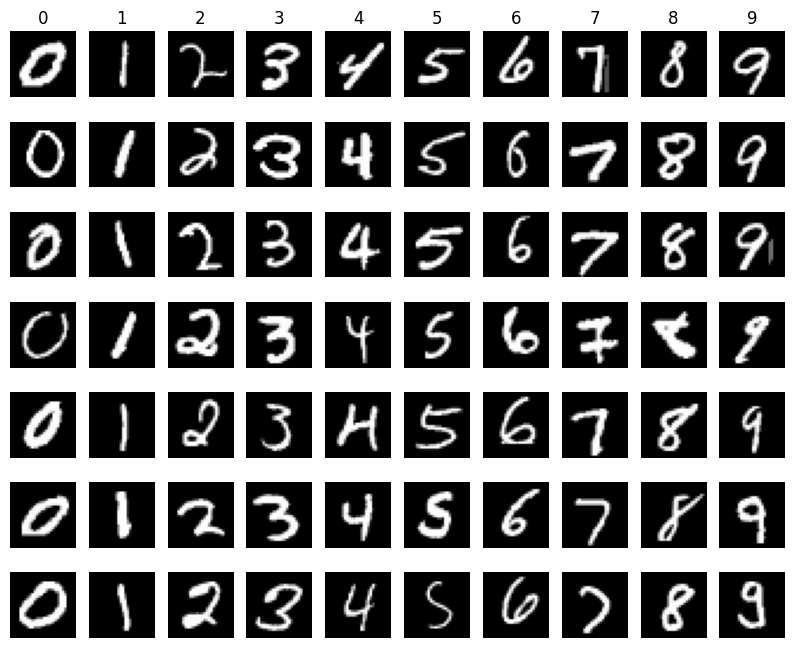

In [446]:
# Visualize some examples from the dataset.
classes = list(range(10))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((28, 28)))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

<span style="color:blue">Data normalization is an important step which ensures that each input parameter has a similar data distribution. This makes convergence faster while training the network.</span>

In [447]:
X_train, X_val, X_test = get_normalized_MNIST_data(X_train, X_val, X_test)

<h1 style="color:#D40078; font-weight:bold;">Train a Model!</h1>

In [ ]:
data = {
    'X_train': X_train,
    'y_train': y_train.astype(int),
    'X_val': X_val,
    'y_val': y_val.astype(int),
    'X_test': X_test,
    'y_test': y_test.astype(int)
    }

model = FullyConnectedNet(
    "classification",
    hidden_dims=[256, 128],
    input_dim=784,
    output_dim=10,
    reg=0,
    weight_scale=5e-2,
    dtype=np.float64
    )
solver = Solver(model, data,
                update_rule=sgd_momentum,
                optim_config={
                  'learning_rate': 1e-3,
                },
                lr_decay=0.95,
                num_epochs=20, batch_size=200,
                print_every=100)
solver.train()

MNIST_solver = solver
MNIST_best_model = model

(Iteration 1 / 5000) loss: 2.351539
(Epoch 0 / 20) train acc: 0.103000; val_acc: 0.095300
(Iteration 101 / 5000) loss: 1.870512
(Iteration 201 / 5000) loss: 1.286139
(Epoch 1 / 20) train acc: 0.755000; val_acc: 0.774000
(Iteration 301 / 5000) loss: 0.897472
(Iteration 401 / 5000) loss: 0.755759
(Epoch 2 / 20) train acc: 0.847000; val_acc: 0.866800
(Iteration 501 / 5000) loss: 0.564553
(Iteration 601 / 5000) loss: 0.553305
(Iteration 701 / 5000) loss: 0.499338
(Epoch 3 / 20) train acc: 0.870000; val_acc: 0.893800
(Iteration 801 / 5000) loss: 0.389628
(Iteration 901 / 5000) loss: 0.638774
(Epoch 4 / 20) train acc: 0.918000; val_acc: 0.904900
(Iteration 1001 / 5000) loss: 0.416931
(Iteration 1101 / 5000) loss: 0.372139
(Iteration 1201 / 5000) loss: 0.296710
(Epoch 5 / 20) train acc: 0.904000; val_acc: 0.912000
(Iteration 1301 / 5000) loss: 0.293138
(Iteration 1401 / 5000) loss: 0.385215
(Epoch 6 / 20) train acc: 0.899000; val_acc: 0.917700
(Iteration 1501 / 5000) loss: 0.338732
(Iteration

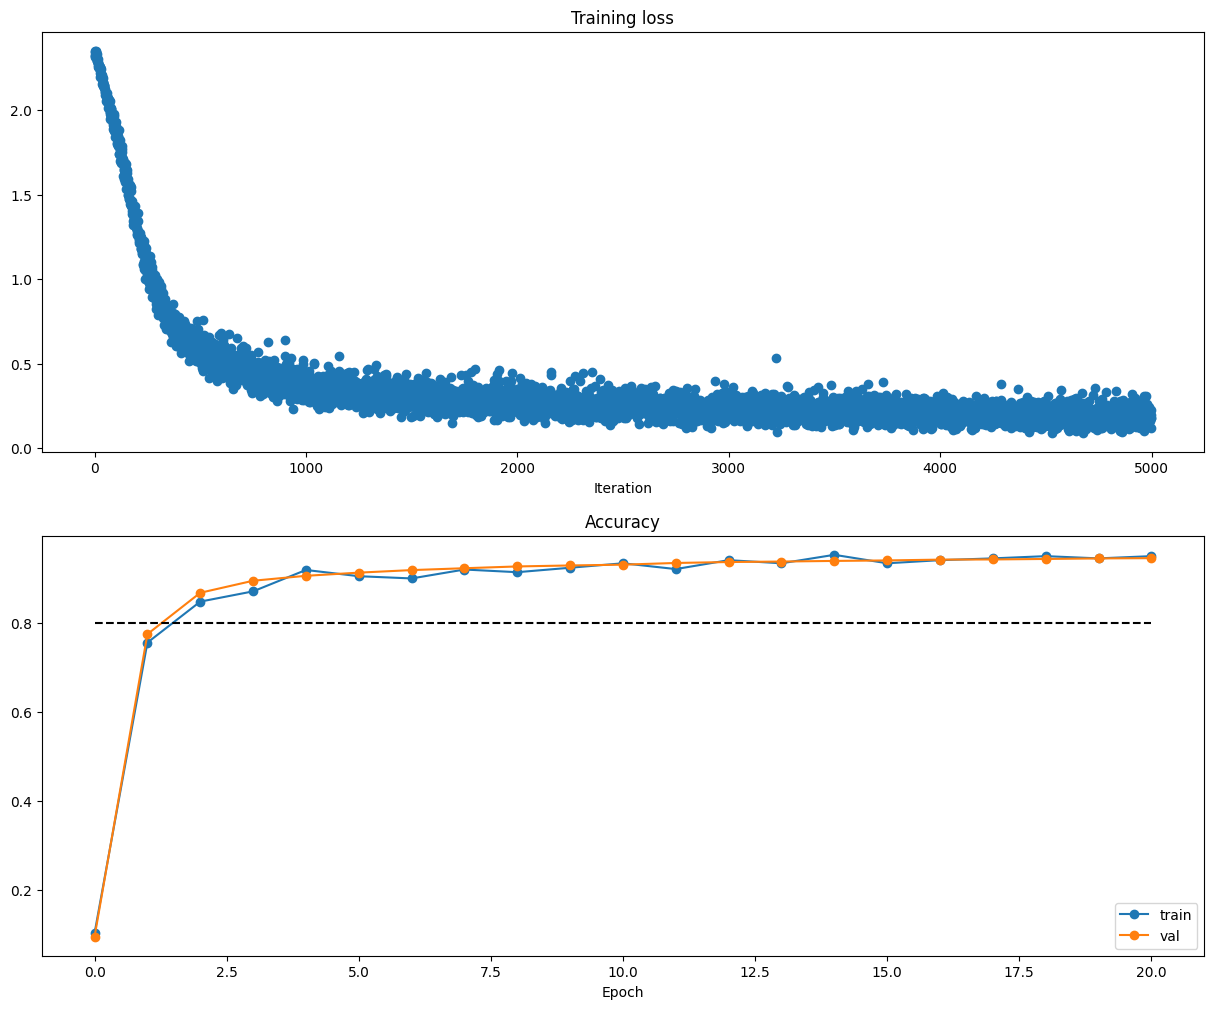

In [466]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(MNIST_solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(MNIST_solver.train_acc_history, '-o', label='train')
plt.plot(MNIST_solver.val_acc_history, '-o', label='val')
plt.plot([0.8] * len(MNIST_solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

<h1 style="color:#D40078; font-weight:bold;">Test the Model!</h1>

In [355]:
y_test_pred = np.argmax(MNIST_best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(MNIST_best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.0779
Test set accuracy:  0.0748


<h1 style="color:#D40078; font-weight:bold;">California housing dataset</h1>
<span style="color:blue">This is a dataset obtained from the [StatLib repository](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.</span>

In [412]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [413]:
X_train, y_train, X_val, y_val, X_test, y_test = get_california_housing_data()
print('Train data shape: ', X_train.shape)
print('Train target values shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation target values shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test target values shape: ', y_test.shape)

Train data shape:  (15640, 8)
Train target values shape:  (15640,)
Validation data shape:  (2500, 8)
Validation target values shape:  (2500,)
Test data shape:  (2500, 8)
Test target values shape:  (2500,)


In [414]:
X_train, X_val, X_test = get_california_housing_normalized__data(X_train, X_val, X_test)

<h1 style="color:#D40078; font-weight:bold;">Train a Model!</h1>

In [442]:
california_housing_best_model = None

data = {
    'X_train': X_train,
    'y_train': y_train.astype(int),
    'X_val': X_val,
    'y_val': y_val.astype(int),
    'X_test': X_test,
    'y_test': y_test.astype(int)
    }

model = FullyConnectedNet(
    category='regression',  
    hidden_dims=[64, 32], 
    input_dim=8,  
    output_dim=1,  
    dtype=np.float64  
)
solver = Solver(model, data,
                update_rule=sgd_momentum,
                optim_config={
                  'learning_rate': 1e-3,
                },
                lr_decay=0.95,
                num_epochs=5, batch_size=200,
                print_every=100)
solver.train()

california_housing_solver = solver
california_housing_best_model = model

(Iteration 1 / 390) loss: 3.084990
(Epoch 0 / 5) train RMS error: 1.981063; val RMS error: 2.609445
(Epoch 1 / 5) train RMS error: 1.219362; val RMS error: 1.684598
(Iteration 101 / 390) loss: 1.620857
(Epoch 2 / 5) train RMS error: 1.208773; val RMS error: 1.546504
(Iteration 201 / 390) loss: 1.375108
(Epoch 3 / 5) train RMS error: 1.229080; val RMS error: 1.533337
(Iteration 301 / 390) loss: 1.490106
(Epoch 4 / 5) train RMS error: 1.197251; val RMS error: 1.531329
(Epoch 5 / 5) train RMS error: 1.274002; val RMS error: 1.534102


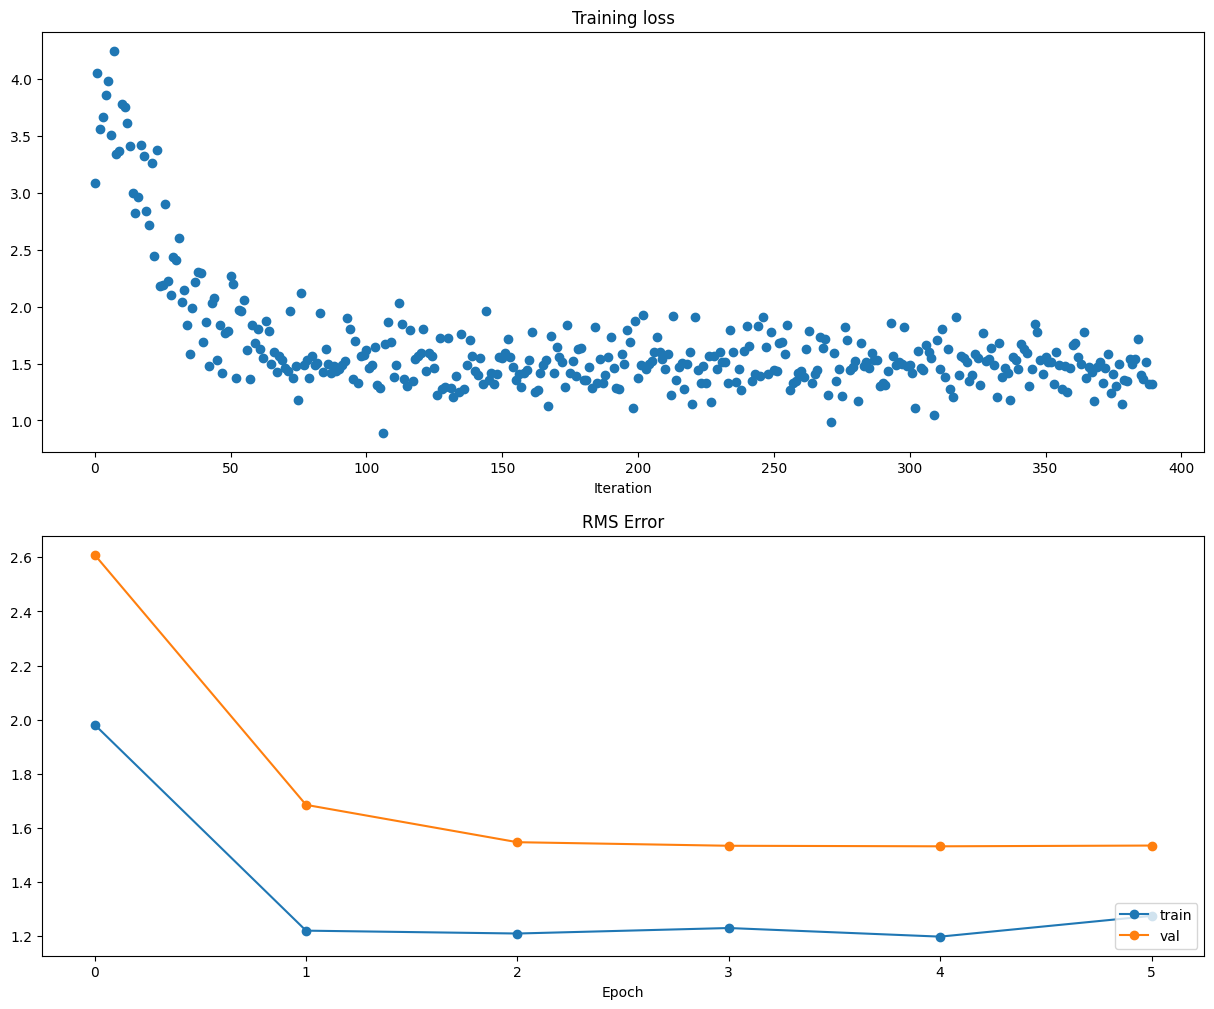

In [443]:
# Run this cell to visualize training loss and train / val RMS error

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(california_housing_solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('RMS Error')
plt.plot(california_housing_solver.train_acc_history, '-o', label='train')
plt.plot(california_housing_solver.val_acc_history, '-o', label='val')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()